<span style="color:red">**Bu ders notları, "Matthias Kohl,  Introduction to statistical data analysis 
with R, 2015, bookboon.com" kitabından çıkarılmıştır.**</span> 

### GİRİŞ

- İstatistik Tanımlayıcı (Descriptive) ve Çıkarımsal (Inferential) istatistik olarak ikiye ayrılır.
- Başlangıç noktası, net bir şekilde karakterize edilmesi gereken bir popülasyon veya evrendir.
- Amaç, bu popülasyon hakkında bazı (yeni, önemli) bilgiler elde etmektir (Örneğin bir sonraki seçimde hangi partinin kaç oy alacağı veya hangi hastalığın hangi sıklıkta görüldüğü gibi).
- Çoğu durumda tam bir araştırma yapmak imkansızdır, çünkü örneğin nüfusun büyüklüğü nedeniyle çok pahalı olacaktır veya nüfus zaman içinde sürekli değişmektedir.

- İstatistiksel olarak yapılan, model parametrelerinin bilinmediği ve belirlenmesi gereken olasılık teorisinden modellerin varsayılmasıdır.
- Bu amaçla, genellikle rastgele seçim yoluyla popülasyondan temsili bir örneklem çekilir ve tanımlayıcı istatistiğin görevi, bu rastgele örneği mümkün olduğunca doğru bir şekilde karakterize etmektir. ,
- Tanımlayıcı istatistikler popülasyon hakkında hiçbir bilgi vermez, ancak "sadece" popülasyondan (rastgele) seçilen kısmı tanımlar. Tanımlayıcı istatistikler, verileri tanımaya ve verilerdeki nadir veya hatalı değerleri tespit etmeye yardımcı olur. 

- Çıkarımsal istatistiğin amacı, temsili bir örneklemden ilgili popülasyon hakkında çıkarımlar yapmaktır.
- Yapılan, mevcut verilerden varsayılan olasılık modellerinin bilinmeyen parametrelerini belirlemektir (tahmin etmektir).
- Ayrıca, mevcut modellerin geçerliliği de incelenebilir.

![image](figure1.png)

**Örnek 1**": İkinci dünya savaşında amaç, Amerikan bombardıman uçaklarını Alman hava savunmasının ateşine karşı daha iyi korumaktı. Bu amaçla, geri dönen uçakların mermi deliklerinin yeri ve sayısı analiz edildi. Toplanan bilgilere dayanarak Ordu, çok sayıda isabet alan yerlerin ek bir zırh alması gerektiği sonucuna vardı.  Buna karşılık, istatistikçi Abraham Wald analizinde isabetlerin uçaklara eşit olarak dağılması gerektiğini varsaymıştır (Wald (1980)). Geri dönmeyen uçaklar için durum böyle olmadığından, geri dönmeyen uçakların çok hassas yerlerinden vurulduğu ve bu nedenle düştüğü sonucuna varmıştır. Sonuç olarak, geri dönen uçakların hiç isabet almadığı ya da çok az isabet aldığı yerlere amor eklenmesini tavsiye etmiştir.

Bir popülasyonun unsurları bir dizi nitelik (değişken) tarafından tanımlanır. Bu niteliklerçeşitli nitelik türlerine ayrılabilir. Bunlar, nitel (kategorik) ve nicel (metrik) niteliklerdir.



![image](figure2.png)

In [1]:
import pandas as pd
icu = pd.read_csv("ICUData.csv")
icu

FileNotFoundError: [Errno 2] No such file or directory: 'ICUData.csv'

- **ID**: hastaların tanımlanması için 1'den 500'e kadar ardışık sayılar. 
- **sex**: düzeyleri kadın ve erkek olan nominal bir değişken
- **age**: yıl cinsinden yaş
- **surgery**: cerrahi türü, seviyeleri olan nominal değişken. cardiothoracic, gastrointestinal, neuro, other, and trauma
- **heart rate**: Yoğun bakımda tüm konaklama süresince dakika başına atım cinsinden maksimum kalp atış hızı.
- **temperature**: YBÜ'de kalınan süre boyunca santigrat derece cinsinden maksimum vücut sıcaklığı.
- **bilirubin**: YBÜ'de kalınan süre boyunca µmol/l (sayısal) cinsinden maksimum bilirubin seviyesi. 
- **SAPS II**: YBÜ'ye kabul sırasında SAPS-II Skoru (tamsayı). Skor fizyolojik durumu yansıtır ve hastalığın ciddiyetini tahmin etmek için kullanılır. Skor ne kadar yüksekse hastalık o kadar şiddetlidir. 
- **liver failure**: karaciğer yetmezliği varlığı.
- **LOS**: YBÜ'de gün olarak kalış süresi.
- **outcome**: YBÜ'den taburcu olma türü.  died, home, other hospital, and secondary care/rehab

In [3]:
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             500 non-null    int64  
 1   sex            500 non-null    object 
 2   age            500 non-null    int64  
 3   surgery        500 non-null    object 
 4   heart rate     500 non-null    float64
 5   temperature    500 non-null    float64
 6   bilirubin      500 non-null    float64
 7   SAPS II        500 non-null    int64  
 8   liver failure  500 non-null    int64  
 9   LOS            500 non-null    int64  
 10  outcome        500 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 43.1+ KB


### Univariate (Tek Değişkenli) Analiz

Nominal değişkenler söz konusu olduğunda, tanımlayıcı istatistikler mutlak ve göreli frekansların hesaplanması ve görselleştirilmesinden oluşur.

In [2]:
icu["surgery"].value_counts()

surgery
cardiothoracic      223
other               121
gastrointestinal     79
neuro                46
trauma               31
Name: count, dtype: int64

Bu sayıları hasta sayısına bölerek göreceli frekansları elde edilir. Buna **ampirik frekans** dağılımı da denir. 

In [3]:
icu["surgery"].value_counts() / icu["surgery"].size

surgery
cardiothoracic      0.446
other               0.242
gastrointestinal    0.158
neuro               0.092
trauma              0.062
Name: count, dtype: float64

Yani, hastaların neredeyse yarısı kardiyotorasik cerrahi geçirmiştir. Bu en sık görülen seviye aynı zamanda mod olarak da adlandırılmaktadır. İkinci sırada diğer ameliyatlar ve ardından gastrointestinal ameliyatlar yer almaktadır. En az sayıda ameliyat travmadan, biraz daha fazla sayıda ameliyat ise nörolojik nedenlerden kaynaklanmıştır.

Göreli ve mutlak frekansların grafiksel gösterimi en iyi çubuk grafiklerle yapılır.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
icu["surgery"].value_counts().plot.bar()
seri = icu["surgery"].value_counts()
plt.bar(seri.index, seri.values)
sns.barplot(x=seri.index, y=seri.values)
px.bar(x=seri.index, y=seri.values)

NameError: name 'icu' is not defined

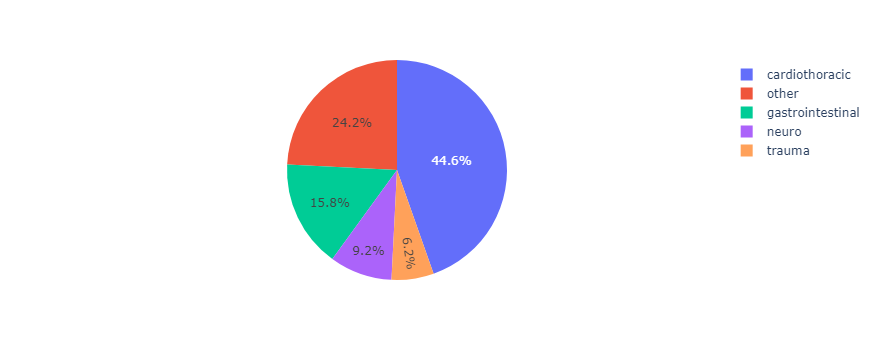

In [10]:
# icu["surgery"].value_counts().plot.pie()
# plt.pie(x=seri.values, labels=seri.index, autopct='%.2f')
px.pie(names=seri.index, values=seri.values)

<span style="color:blue">"Pasta grafikler, bilgi göstermenin çok kötü bir yoludur. Göz, doğrusal ölçümleri değerlendirmede iyi, göreceli alanları değerlendirmede ise kötüdür. Çubuk grafik veya nokta grafik, bu tür verileri görüntülemek için tercih edilen bir yoldur."</span>

**Quantile** : Bir quantile, bir veri kümesinin belirli bir bölümünü tanımlar, yani bir quantile, bir dağılımdaki kaç değerin belirli bir sınırın üstünde veya altında olduğunu belirler. Özel nicelikler çeyrek (quarter), ondalık (decile) ve yüzdelik (percentiles) olarak adlandırılır.

Örneğin; e: Bir dağılımı dört eşit parçaya bölersek, dört çeyreklikten söz ederiz. İlk çeyrek dilim, tüm değerlerin dörtte birinden daha küçük olan tüm değerleri içerir. Grafiksel bir gösterimde, bir dağılımın toplam alanının %25'ine karşılık gelir. İki alt çeyrek ise tüm dağılım değerlerinin %50'sini kapsar.

In [13]:
icu.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,500.0,250.500000,144.481833,1.000000,125.750000,250.500000,375.250000,500.000000
age,500.0,63.060000,14.766601,18.000000,55.000000,66.000000,73.000000,98.000000
heart rate,500.0,107.414400,20.857983,59.200000,92.725000,104.000000,119.000000,186.000000
temperature,500.0,37.663200,1.735474,9.100000,36.900000,37.700000,38.400000,42.000000
bilirubin,500.0,25.744434,48.422056,3.679049,10.705027,15.312147,23.427203,647.304964
SAPS II,500.0,44.884000,17.224166,12.000000,31.000000,42.000000,57.000000,125.000000
liver failure,500.0,0.040000,0.196155,0.000000,0.000000,0.000000,0.000000,1.000000
LOS,500.0,5.290000,9.857802,1.000000,1.000000,1.000000,5.000000,105.000000


In [2]:
import numpy as np
list1 = list(range(2, 22, 2))
list2 = [*range(2, 22, 2)]
list3 = np.arange(2, 22, 2).tolist()
print(list1)
print(list2)
print(list3)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


In [17]:
np.quantile(list1, 0.2)

5.6

In [18]:
np.quantile(icu["SAPS II"], 0.5)

42.0

Yani, hastaların %50'sinin SAPS II skoru ≤ 42 ve %50'sinin skoru ≥ 42'dir. Medyan, sözde bir konum parametresidir ve bize değerlerin değişkenliği hakkında herhangi bir bilgi vermez. Bu amaçla kantiller de kullanılabilir. Çok sık kullanılan bir ölçek veya dağılım parametresi, interquartile range  (IQR) olarak adlandırılan, üçüncü ve birinci çeyrek arasındaki mesafedir (yani 𝑞0,75 - 𝑞0,25)

In [19]:
from scipy.stats import iqr
iqr(icu["SAPS II"])

26.0

In [20]:
q75, q25 = np.percentile(icu["SAPS II"], [75 ,25])
iqr = q75 - q25
iqr

26.0

Sonuç olarak, hastaların orta %50'si 26 SAPS II puan aralığına sahiptir. Değerlerin dağılımını değerlendirmek için bir başka seçenek de median absolute deviation (MAD) dır.

In [3]:
from scipy.stats import median_abs_deviation

median_abs_deviation(icu["SAPS II"])

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'icu' is not defined

Kantiller aynı zamanda tanımlayıcı istatistiklerdeki en önemli grafiksel gösterimlerden biri olan box-plot grafiğinin de temelini oluşturmaktadır; gözlemlerin medyan, IQR ve aralık bilgilerini çok iyi özetler. Ayrıca, şüpheli gözlemleri (aykırı değerler) belirlemek için de uygulanabilir.

![image](figure3.png)

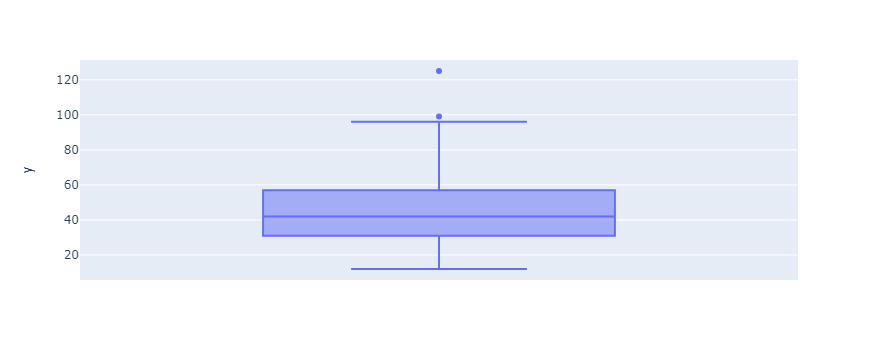

In [11]:
# icu["SAPS II"].plot.box()
# plt.boxplot(icu["SAPS II"])
# sns.boxplot(icu["SAPS II"])
px.box(y=icu["SAPS II"])

#### Örnek 1 : 
Tekrar 2, 4, 6, ... , 20 dizisini ele alalım ve medyan ve üçüncü çeyreklik ile %90 ve %95'lik çeyreklikleri hesaplayalım.

#### Örnek 2 :
Yukarıdaki örnekte en büyük değer 200 yapılırsa sonuçlar nasıl etkilenir? Yorumlayınız?

**Verilerin dağılımını görselleştirmek için bir başka seçenek de ampirik kümülatif dağılım fonksiyonudur.**

<Axes: xlabel='SAPS II', ylabel='Proportion'>

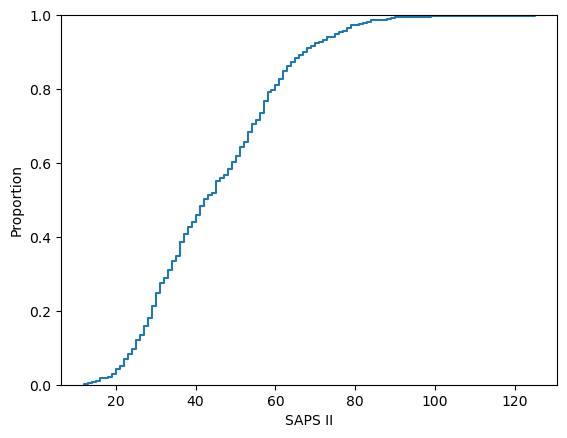

In [14]:
import seaborn as sns

sns.ecdfplot(data=icu, x="SAPS II")

### Bivariate (İki Değişkenli) Analiz

Değişken çiftleri arasındaki ilişkiyi araştırma işlemidir. Nominal değişkenlerle yapılması durumunda, , tüm olası seviye kombinasyonlarının mutlak veya göreceli frekanslarının hesaplanması ve çizilmesinden oluşur. Bu, olasılık tablosu veya çapraz tablo olarak adlandırılan bir tabloya yol açar. YBÜ veri setinin cinsiyet ve ameliyat değişkenlerini analiz edelim. 

In [15]:
pd.crosstab(icu['sex'], icu['surgery'])

surgery,cardiothoracic,gastrointestinal,neuro,other,trauma
sex,,,,,
female,61,31,19,57,7
male,162,48,27,64,24


Göreceli frekanslar ile tablo aşağıdaki gibi gösterebilir.

In [16]:
pd.crosstab(icu['sex'], icu['surgery'], normalize="index")

surgery,cardiothoracic,gastrointestinal,neuro,other,trauma
sex,,,,,
female,0.348571,0.177143,0.108571,0.325714,0.040000
male,0.498462,0.147692,0.083077,0.196923,0.073846


İki (veya daha fazla) nominal (veya sıralı) değişken arasındaki ilişkinin gücü, (contingency) olumsallık katsayıları olarak adlandırılan katsayılarla belirlenebilir.

**χ² testi** :Ki-kare (χ²) istatistiği, iki kategorik değişken arasında anlamlı bir ilişki olup olmadığını incelemek için kullanılan istatistiksel bir testtir.

![image](figure4.png)

- Oij: (i, j) hücresinde gözlemlenen frekanstır.
- Eij: herhangi bir ilişki olmadığı varsayımı altında hesaplanan (i, j) hücresindeki beklenen frekanstır.

χ²'ye dayanarak aşağıdaki contingency katsayıları elde edilir.

![image](figure5.png)

- Uygulamada, hesaplanan contingency katsayısının mümkün olan maksimum değerinin farkında olmak önemlidir. Ayrıca, contingency katsayılarının açık bir dezavantajı, yalnızca bir ilişkinin gücünü ölçmeleri, ancak bir ilişkinin yönünü belirleyememeleridir; bu, örneğin sıralı nitelikler söz konusu olduğunda ilgi çekicidir.
- φ katsayısı [0; 1] aralığında değerler alır, burada 1 yalnızca belirli koşullar altında mümkündür. Eğer sonuç 0 ise, iki özellik bağımsızdır.
- Pearson'ın olumsallık katsayısının aralığı ![image](figure6.png) şeklindedir. 0 araştırılan özelliklerin bağımsızlığını gösterir.
- Cramér'in V'si [0; 1] aralığında değerler alır ve burada yine 0 bağımsızlığı temsil eder. 𝑉 ≤ 0,3 ise zayıf bağımlılıktan, 0,3 < 𝑉 ≤ 0,7 ise orta derecede bağımlılıktan ve 𝑉 > 0,7 ise güçlü bağımlılıktan bahsedilir.

In [38]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(icu['sex'], icu['surgery']).values)

Chi2ContingencyResult(statistic=17.056556195174373, pvalue=0.0018846482532295353, dof=4, expected_freq=array([[ 78.05,  27.65,  16.1 ,  42.35,  10.85],
       [144.95,  51.35,  29.9 ,  78.65,  20.15]]))

In [18]:
import math
chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(icu['sex'], icu['surgery']))
contingency_coefficient = math.sqrt(chi2_stat / (chi2_stat + len(icu)))
contingency_coefficient

0.18162542772960075

In [4]:
data = pd.crosstab(icu['sex'], icu['surgery']).values

X2 = chi2_contingency(data, correction=False)[0] 
N = np.sum(data) 
minimum_dimension = min(data.shape)-1
np.sqrt((X2/N) / minimum_dimension) 

NameError: name 'pd' is not defined

<Axes: xlabel='surgery'>

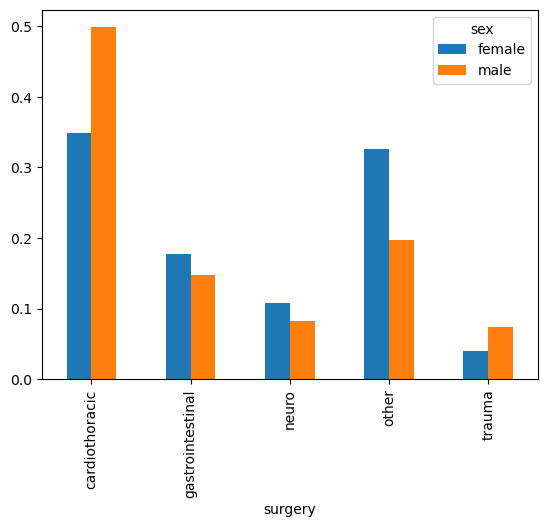

In [43]:
pd.crosstab(icu['sex'], icu['surgery'], normalize="index").T.plot.bar()

### OLASILIK DAĞILIMLARI

- Bir örneklemden ilgili popülasyonla ilgili çıkarım yapabilmek için olasılık teorisi modellerine ihtiyaç duyulmaktadır. Bu tür modellerin temeli de olasılık dağılımlarıdır.
- Çıkarımsal (parametrik) istatistiğin amacı, verilen verilerden varsayılan olasılık dağılımlarının bilinmeyen parametrelerini tahmin etmektir.